# Training a Multilayer Neural Network for Image Classification

First, let's import the necessary packages

In [26]:
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [27]:
# Ignore useless warnings 
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

The MNIST dataset is a set of images of handwritten digits 0-9, with the associated target classes also numbered as 0-9. 

In [28]:
digits_mnist = keras.datasets.mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

Let's look at the shape and data of the training set

In [29]:
X_train_full.shape

(60000, 28, 28)

In [30]:
X_train_full.dtype

dtype('uint8')

Instead of eventually doing cross validation on the training set, let's further break the training set into a training set and a validation set, as this is more reliable, if we have the data to do it. Let's also scale the intensities of each pixel to be in the range 0-1.


In [31]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's look at the first image in the training set:

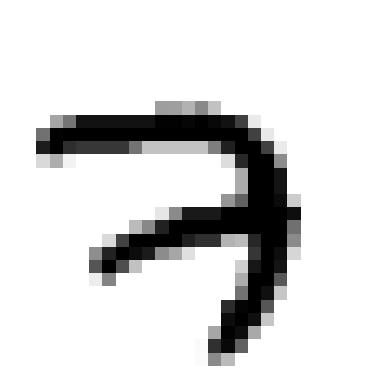

In [32]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are numbers that correspond to the class names

In [33]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

Here are the corresponding class names:

In [34]:
class_names = ["0","1","2","3","4","5","6","7","8","9"]
class_names[y_train[0]]

'7'

Let's look at the sizes for our train, validation and test sets:

In [35]:
X_train.shape

(55000, 28, 28)

In [36]:
X_valid.shape

(5000, 28, 28)

In [37]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

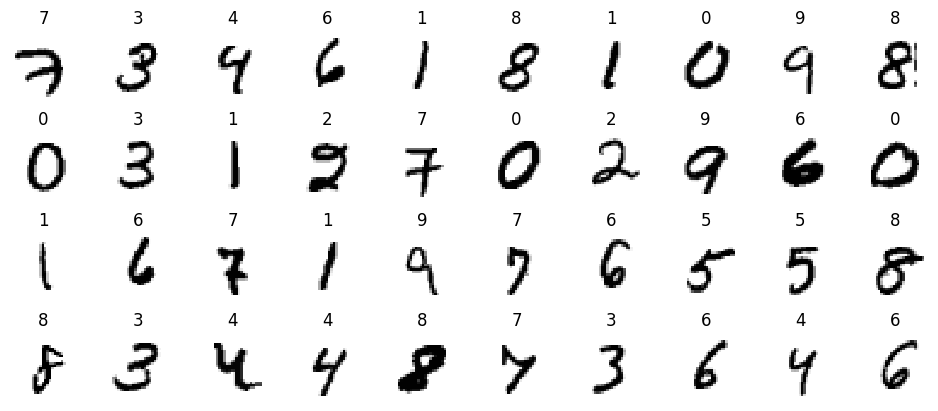

In [38]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

<!--Let's build a neural network with <b>five</b> hidden layers. Let's setup our random seeds for reproducibility-->
Let's build a neural network with <b>two</b> hidden layers. Let's setup our random seeds for reproducibility

In [39]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

Let's use the simplest sequential model. 
* We build our input layer that flattens the images into a 1D array.

* First, we add a dense hidden layer with 500 neurons; it manages its own weight matrix and bias terms, and uses the ReLU activation function.

* Next, we add a second hidden layer with 180 neurons and the ReLU activation function.

* Then we add a third hidden layer with 40 neurons and the ReLU activation function. Notice how we get significantly sparser with the neurons as we go deeper.

* Again, we add a fourth hidden layer 20, this time with N-1/2 as many neurons.

* Finally, we add the output layer with 10 neurons (for the 10 output classes). Since we must choose one of those 10 classes, we use the softmax activation function, rather than the sigmoid activation function. Softmax can handle the multinomial classification problem. 

In [40]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(180, activation="relu"))
model.add(keras.layers.Dense(40, activation="relu"))
model.add(keras.layers.Dense(20, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

You can look at textual and visual summaries of the model

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 180)               90180     
                                                                 
 dense_2 (Dense)             (None, 40)                7240      
                                                                 
 dense_3 (Dense)             (None, 20)                820       
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
Total params: 490,950
Trainable params: 490,950
Non-trai

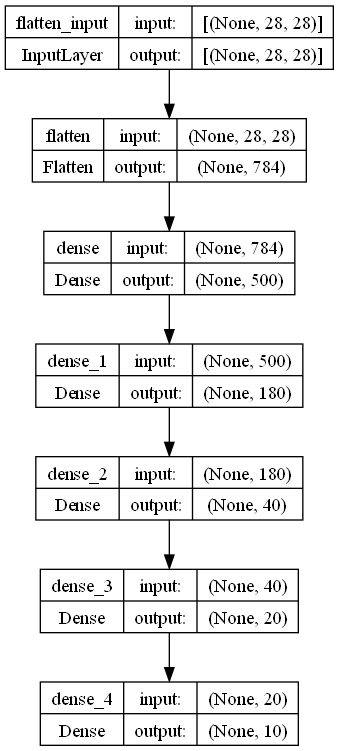

In [42]:
keras.utils.plot_model(model, "my_digit_mnist_model.png",show_shapes=True)

You can access the model's layers and individual layers as below. 

In [43]:
model.layers

Not of significant importance, but notice how our count of layers is accessible.  It's convenient!

In [44]:
hidden1 = model.layers[1]
hidden1.output

<KerasTensor: shape=(None, 500) dtype=float32 (created by layer 'dense')>

In [45]:
model.get_layer(hidden1.name) is hidden1

True

You can also seen the parameters for a particular layer

In [46]:
weights, biases = hidden1.get_weights()
weights

array([[ 0.04042035,  0.02890421, -0.01643532, ...,  0.06529921,
        -0.00074966, -0.0234203 ],
       [-0.03031717, -0.05337032, -0.05923666, ..., -0.06415853,
         0.02011354,  0.06289456],
       [-0.00991102, -0.03342467,  0.01434299, ...,  0.0579138 ,
         0.05533031,  0.04073295],
       ...,
       [ 0.02878438, -0.03052115,  0.03628915, ..., -0.01548316,
        -0.04385414, -0.0223248 ],
       [ 0.04099938,  0.0381458 , -0.05898746, ...,  0.0384917 ,
        -0.02242666,  0.00913946],
       [-0.02409086,  0.06582481, -0.03756199, ...,  0.0065355 ,
         0.03086951, -0.01211907]], dtype=float32)

In [47]:
weights.shape

(784, 500)

In [48]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [49]:
biases.shape

(500,)

After a model is created, you must call its compile() method to specify the loss function and optimizer to use. You can also optionally specify extra metrics to compute during training and evaluation. For more information, check out the<code>keras</code>documentation: https://keras.io/api/models/
To start out, we'll use a stochastic gradient descent model.

<h2>Critical points:</h2>
*  We use "sparse_categorical_crossentropy" because we have sparse labels.  </br>
   That is, for each instance examined, there is a target class index from 0-9.* </br>
* We will train the model using simple stochastic gradient descent  with a learning rate of 0.01 and momentum of 0. There are multiple parameters you can specify here.

\* Since this is a classifier, it's useful to measure the accuracy during training and evaluation<br/>
<p><b>*</b> Were we performing <i>binary</i> classification: 
<ul>
    <ol>
    <li>
        <b>Activation Function:</b> Sigmoid returns 0 or 1, so sigmoid would outperform softmax </li>
    <li>
        <b>Classification:</b> we'd use a <code>binary_crossentropy</code></li>     
    </ol>
</ul>
</p>

In [50]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(learning_rate=0.01,momentum=0.0),
              metrics=["accuracy"])

To train the model, we simply call the fit function. 
* We specify the epochs, and we provide our validation set. Since we have this validation set, we will not use cross validation. The training reports a training and validation loss and accuracy.
* fit() defaults to a batch_size of 32 This means that 32 sampled instances are used per epoch, and not the full training set. While it is the default value, it's important to note that it's been found that using the full training set can lead to suboptimal model generation. If a larger value is desired, stick to powers of 2.

In [51]:
history = model.fit(X_train, y_train, epochs=10,batch_size=32, 
                    validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.6861 - accuracy: 0.8006 - val_loss: 0.2694 - val_accuracy: 0.9272
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2411 - accuracy: 0.9296 - val_loss: 0.1928 - val_accuracy: 0.9420
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1740 - accuracy: 0.9489 - val_loss: 0.1444 - val_accuracy: 0.9562
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1367 - accuracy: 0.9606 - val_loss: 0.1266 - val_accuracy: 0.9656
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1131 - accuracy: 0.9672 - val_loss: 0.1116 - val_accuracy: 0.9680
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0943 - accuracy: 0.9717 - val_loss: 0.0997 - val_accuracy: 0.9716
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0794 - accuracy: 0.9773 - val_loss: 0.1037 - val_accuracy:

The fit() method returns a history object that contains the training parameters, list of epochs it went through, and a dictionary containing the loss and extra metrics measured at the end of each epoch. 

In [52]:
history.params

{'verbose': 1, 'epochs': 10, 'steps': 1719}

In [53]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [54]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

You can use this data to plot the bias-variance curve. You can see that we have still not overfit the model, so we could probably keep training for more epochs.
The validation set loss plot serves as our Test data line in the graph in the Performance Evaluation lecture, while the training set loss plot serves as the CV line in our graph in lecture

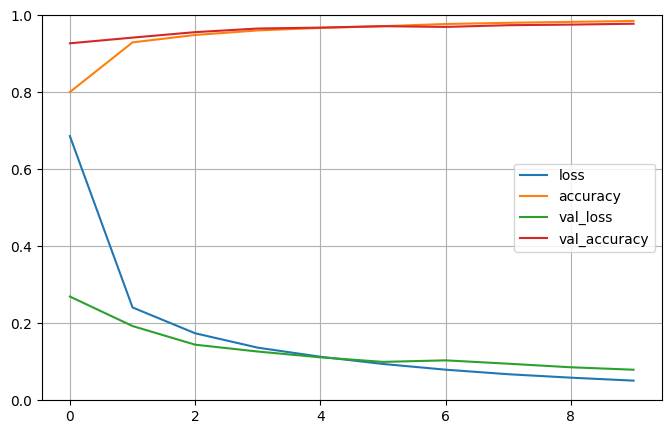

In [55]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Now that we've achieved >95% accuracy, it's time to interpret the model's performance.

To do so, we'll evaluate it on the test set to estimate the generalization error using the evaluate() method

In [56]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0824 - accuracy: 0.9746


[0.08243716508150101, 0.9746000170707703]

Next, use the predict() method to make predictions. Since we don't have new instances, let's just use the first 3 instances of the test set.

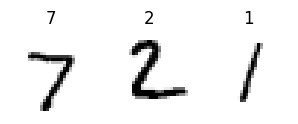

In [57]:
n_rows = 1
n_cols = 3
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [58]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(5)

1/1 [==============================] - 0s 78ms/step


array([[0.0000e+00, 0.0000e+00, 1.0000e-05, 3.6000e-04, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 9.9961e-01, 0.0000e+00, 3.0000e-05],
       [0.0000e+00, 2.4000e-04, 9.9900e-01, 2.6000e-04, 0.0000e+00,
        0.0000e+00, 1.0000e-05, 0.0000e+00, 4.9000e-04, 0.0000e+00],
       [1.0000e-05, 9.9680e-01, 1.6000e-04, 3.0000e-05, 3.6000e-04,
        8.0000e-05, 4.1000e-04, 4.3000e-04, 1.6500e-03, 8.0000e-05]],
      dtype=float32)

As you can see above, there are three vecors in the array; each one corresponding to a sample in the subset.  Each vector is the resulting probabalistic predictions that the model estimates  for each class from 0 to 9. 

So to translate the array above to layman's:
* [1] is class 7 (number 7) with 100% probability class 7 (sneaker) with 3% probability. 
* [2] is class 2 (number 2) with 100% probability 
* [3] is class 1 (number 1) with 0.99% probability 

If you only care about the class with the highest estimated probability (even if that probability is quite low), then you can use the predict() method instead

In [59]:
y_pred = model.predict(X_new)
# Disable Scientific Notation for easy reading
np.set_printoptions(suppress=True)
print(np.expand_dims(y_pred, axis=1)) 

1/1 [==============================] - 0s 17ms/step
[[[0.00000008 0.0000002  0.00000612 0.00035601 0.00000004 0.00000002
   0.         0.9996057  0.00000058 0.00003127]]

 [[0.00000078 0.00023791 0.9989956  0.00026327 0.         0.00000006
   0.00000865 0.00000006 0.00049357 0.        ]]

 [[0.00000782 0.99679583 0.00016344 0.00002817 0.00036084 0.00007602
   0.00041403 0.00042605 0.00165217 0.00007562]]]


In [60]:
pred = np.argmax(y_pred,axis=1)
np.array(class_names)[pred]

array(['7', '2', '1'], dtype='<U1')

Here the classifier classified all three images correctly.

In [61]:
y_new = y_test[:3]
y_new

array([7, 2, 1], dtype=uint8)

And we can see the actual images too

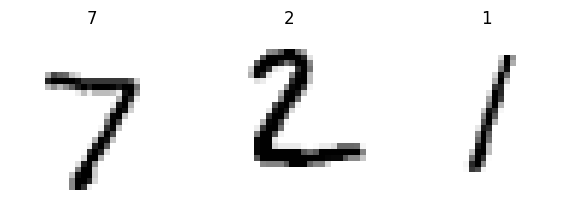

In [62]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Our final accuracy is 97%!